In [1]:
# This cell is for development only. Don't copy this to your notebook.
%load_ext autoreload
%autoreload 2
import anndata

anndata.logging.anndata_logger.addFilter(
    lambda r: not r.getMessage().startswith("storing")
    and r.getMessage().endswith("as categorical.")
)

# Temporarily suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
import tarfile
import anndata
import warnings

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [3]:
# Load the TCR data
adata_tcr = ir.io.read_10x_vdj(
    "example_data/liao-2019-covid19/GSM4385993_C144_filtered_contig_annotations.csv.gz"
)

# Load the associated transcriptomics data
adata = sc.read_10x_h5(
    "example_data/liao-2019-covid19/GSM4339772_C144_filtered_feature_bc_matrix.h5"
)

reading example_data/liao-2019-covid19/GSM4339772_C144_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


This particular sample only has a detected TCR for a small fraction of the cells:

In [4]:
adata_tcr.shape

(136, 0)

In [5]:
adata.shape

(3716, 33539)

In [6]:
ir.pp.merge_with_ir(adata, adata_tcr)

Now, we can use TCR-related variables together with the gene expression data.
Here, we visualize the cells with a detected TCR on the UMAP plot.
It is reassuring that the TCRs coincide with the T-cell marker gene CD3.

computing PCA


    with n_comps=50


    finished (0:00:01)


computing neighbors


    using 'X_pca' with n_pcs = 50


    finished (0:00:06)


computing UMAP


    finished (0:00:05)


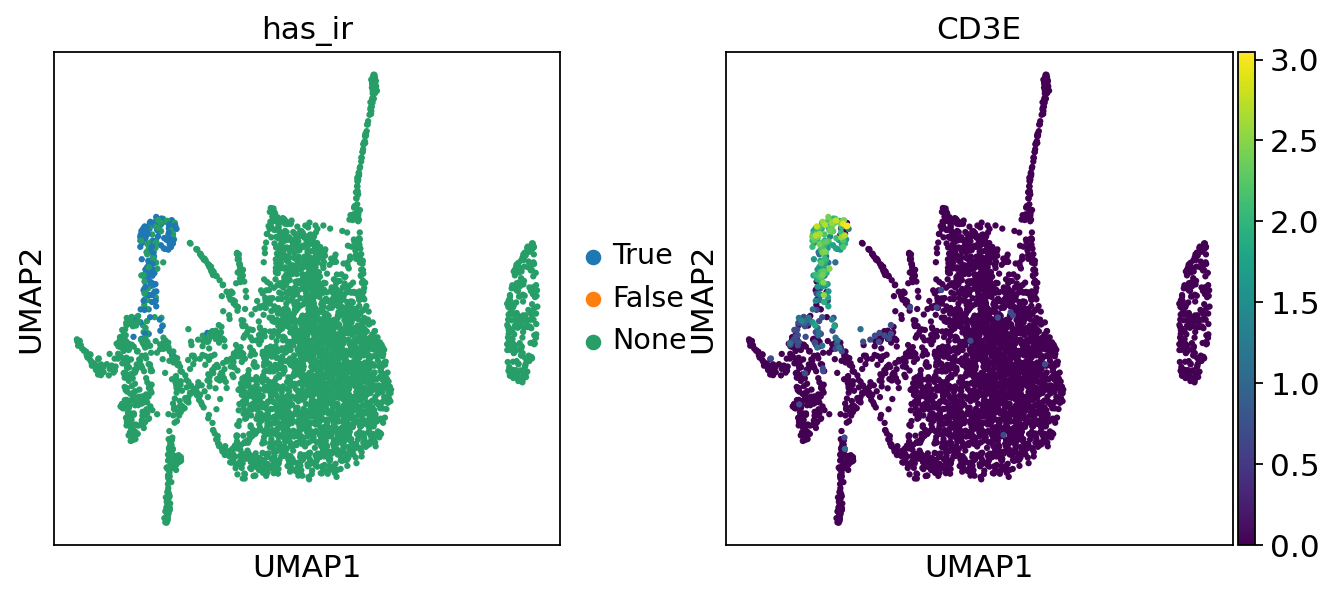

In [7]:
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E"])

In [8]:
# extract data
with tarfile.open("example_data/chung-park-2017.tar.bz2", "r:bz2") as tar:
    tar.extractall("example_data/chung-park-2017")

In [9]:
# Load transcriptomics data from count matrix
expr_chung = pd.read_csv("example_data/chung-park-2017/counts.tsv", sep="\t")
# anndata needs genes in columns and samples in rows
expr_chung = expr_chung.set_index("Geneid").T
adata = sc.AnnData(expr_chung)
adata.shape

(563, 23438)

In [10]:
adata_tcr.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_2_locus,IR_VJ_1_productive,IR_VJ_2_productive,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir
obs_names,,,,,,,,,,,,,,,,,,,,,
AAACGGGCAGTAAGAT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,40742.0,NaN,...,NaN,True,None,True,None,TRAV12-2,NaN,TRBV15,NaN,True
AAAGCAATCCGGGTGT-1,True,True,False,"[{""c_call"": ""TRBC2"", ""consensus_count"": 7866, ...",TRAC,NaN,TRBC2,NaN,32200.0,NaN,...,NaN,True,None,True,None,TRAV12-2,NaN,TRBV15,NaN,True
AAATGCCAGAAGGTGA-1,True,True,False,"[{""c_call"": ""TRAC"", ""consensus_count"": 13546, ...",TRAC,NaN,TRBC1,NaN,37692.0,NaN,...,NaN,True,None,True,None,TRAV21,NaN,TRBV4-1,NaN,True
AACCATGTCCCTGACT-1,True,True,False,"[{""c_call"": ""TRBC1"", ""consensus_count"": 27398,...",TRAC,NaN,TRBC2,NaN,20780.0,NaN,...,NaN,True,None,True,None,TRAV4,NaN,TRBV24-1,NaN,True
AACCGCGGTATTACCG-1,True,True,False,"[{""c_call"": ""TRBC1"", ""consensus_count"": 38186,...",TRAC,NaN,TRBC2,NaN,21536.0,NaN,...,NaN,True,None,True,None,TRAV1-2,NaN,TRBV12-4,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGGACAGGGTGTGT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,22304.0,NaN,...,NaN,True,None,True,None,TRAV8-3,NaN,TRBV12-4,NaN,True
TTCCCAGAGGCTATCT-1,True,True,False,[],TRAC,NaN,TRBC2,NaN,11806.0,NaN,...,NaN,True,None,True,None,TRAV12-2,NaN,TRBV6-5,NaN,True
TTGCCGTGTGCATCTA-1,True,True,False,[],TRAC,NaN,TRBC1,NaN,21220.0,NaN,...,NaN,True,None,True,None,TRAV17,NaN,TRBV20-1,NaN,True


In [11]:
# Load TCR data and merge it with transcriptomics data
adata_tcr = ir.io.read_tracer("example_data/chung-park-2017/tracer/")
ir.pp.merge_with_ir(adata, adata_tcr)

If you pass `n_top_genes`, all cutoffs are ignored.


extracting highly variable genes


    finished (0:00:00)


computing PCA


    on highly variable genes


    with n_comps=50


    finished (0:00:00)


computing neighbors


    using 'X_pca' with n_pcs = 50


    finished (0:00:00)


computing UMAP


    finished (0:00:01)


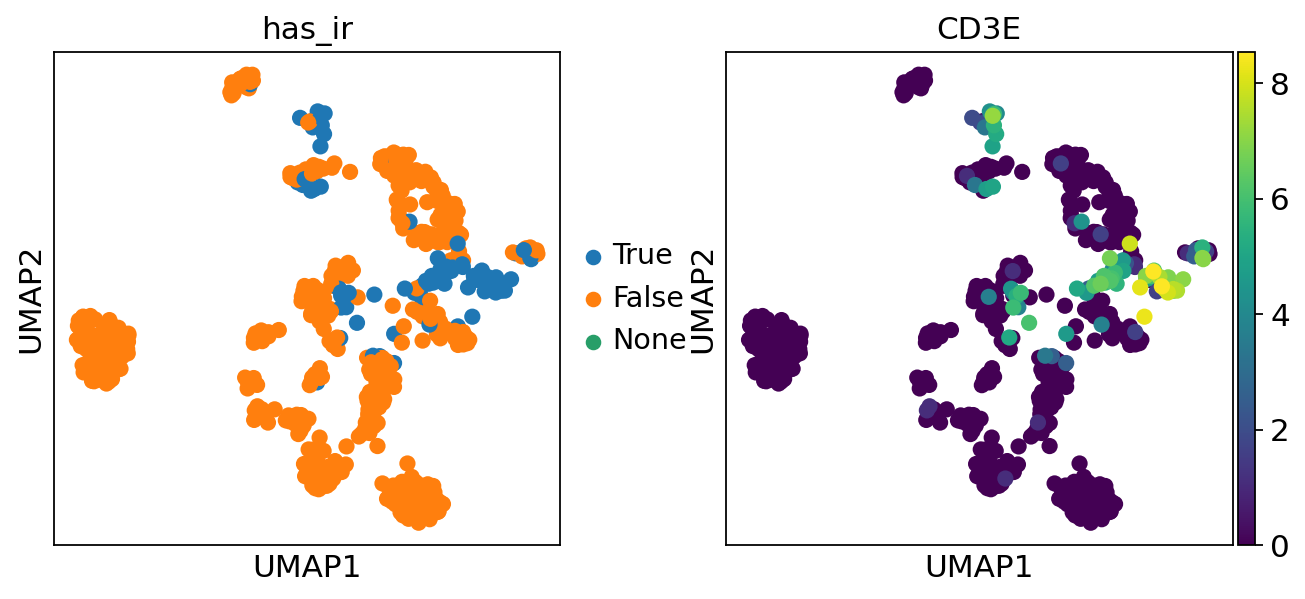

In [12]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=3000)
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E"])

In [13]:
adata = ir.io.read_airr(
    [
        "example_data/immunesim_airr/immunesim_tra.tsv",
        "example_data/immunesim_airr/immunesim_trb.tsv",
    ]
)
ir.tl.chain_qc(adata)

In [14]:
ir.pp.ir_dist(adata, metric="alignment", sequence="aa", cutoff=25)

Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 30.51it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 29.97it/s]

Initializing lookup tables. 


Computing clonotype x clonotype distances.


  0%|          | 0/100 [00:00<?, ?it/s]

 65%|██████▌   | 65/100 [00:00<00:00, 643.74it/s]

100%|██████████| 100/100 [00:00<00:00, 659.02it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


<AxesSubplot:title={'center':'cc_aa_alignment'}>

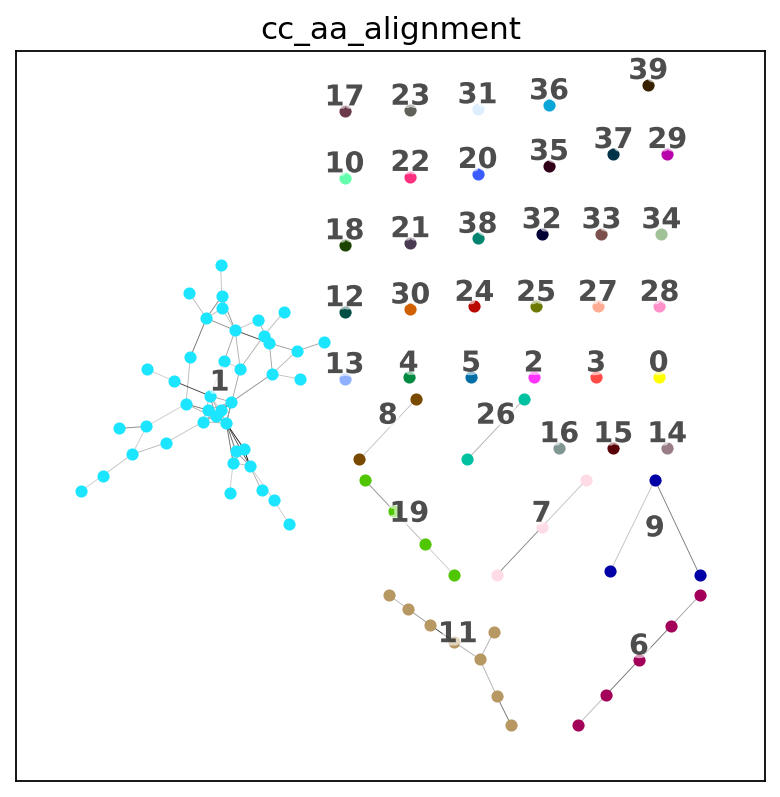

In [15]:
ir.tl.define_clonotype_clusters(
    adata,
    metric="alignment",
    sequence="aa",
    receptor_arms="any",
    dual_ir="primary_only",
)
ir.tl.clonotype_network(adata, size_aware=False, metric="alignment", sequence="aa")
ir.pl.clonotype_network(
    adata,
    color="cc_aa_alignment",
    base_size=20,
    panel_size=(6, 6),
    show_legend=False,
    show_size_legend=False,
)

In [16]:
tcr_table = pd.read_csv(
    "example_data/chung-park-2017/tcr_table.tsv",
    sep="\t",
    index_col=0,
    na_values=["None"],
    true_values=["True"],
)
tcr_table

,cell_id,cdr3_alpha,cdr3_nt_alpha,count_alpha,v_alpha,j_alpha,cdr3_beta,cdr3_nt_beta,count_beta,v_beta,d_beta,j_beta,productive_alpha,productive_beta
0,SRR2973278,AVSDIHASGGSYIPT,GCTGTTTCGGATATTCATGCATCAGGAGGAAGCTACATACCTACA,9.29463,TRAV21,TRAJ6,ASSWWQNTEAF,GCCAGCAGCTGGTGGCAGAACACTGAAGCTTTC,37.5984,TRBV5-1,NaN,TRBJ1-1,True,True
1,SRR2973305,AVVTGANSKLT,GCTGTGGTAACTGGAGCCAATAGTAAGCTGACA,89.45740,TRAV22,TRAJ56,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2,SRR2973371,ALKRTGNTPLV,GCTCTGAAAAGAACAGGAAACACACCTCTTGTC,431.96500,TRAV9-2,TRAJ29,ASRSRDSGEPQH,GCCAGCAGGAGCAGGGACAGCGGAGAGCCCCAGCAT,952.0230,TRBV10-2,TRBD1,TRBJ1-5,True,True
3,SRR2973377,ATDPETSGSRLT,GCTACGGACCCAGAAACCAGTGGCTCTAGGTTGACC,772.43600,TRAV17,TRAJ58,NaN,NaN,NaN,NaN,NaN,NaN,True,True
4,SRR2973403,AVRGATDSWGKFQ,GCTGTGAGAGGAGCAACTGACAGCTGGGGGAAATTCCAG,95.63640,TRAV3,TRAJ24,SVQTSEYEQY,AGCGTCCAGACTAGCGAGTACGAGCAGTAC,205.8330,TRBV29-1,TRBD2,TRBJ2-7,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,SRR5023618,NaN,NaN,NaN,NaN,NaN,ASSDSPFSSYNEQF,GCCAGCAGTGACTCGCCCTTTAGCTCCTACAATGAGCAGTTC,864.4550,TRBV6-4,NaN,TRBJ2-1,True,True
86,SRR5023621,AENSGGSNYKLT,GCAGAGAATAGTGGAGGTAGCAACTATAAACTGACA,512.63000,TRAV13-2,TRAJ53,ASSPDGGGGYT,GCCAGCAGCCCTGATGGGGGAGGGGGCTACACC,805.2010,TRBV7-3,TRBD2,TRBJ1-2,True,True
87,SRR5023626,ALRIGSNYKLT,GCTCTGAGAATCGGTAGCAACTATAAACTGACA,12.51630,TRAV9-2,TRAJ53,NaN,NaN,NaN,NaN,NaN,NaN,True,True
88,SRR5023633,NaN,NaN,NaN,NaN,NaN,ASGLGQSVGGTQY,GCTAGTGGCCTAGGGCAGTCGGTAGGAGGGACCCAGTAC,18.4273,TRBV12-5,TRBD2,TRBJ2-5,True,True


In [17]:
tcr_cells = []
for idx, row in tcr_table.iterrows():
    cell = ir.io.AirrCell(cell_id=row["cell_id"])
    alpha_chain = ir.io.AirrCell.empty_chain_dict()
    beta_chain = ir.io.AirrCell.empty_chain_dict()
    alpha_chain.update(
        {
            "locus": "TRA",
            "junction_aa": row["cdr3_alpha"],
            "junction": row["cdr3_nt_alpha"],
            "consensus_count": row["count_alpha"],
            "v_call": row["v_alpha"],
            "j_call": row["j_alpha"],
            "productive": row["productive_alpha"],
        }
    )
    beta_chain.update(
        {
            "locus": "TRB",
            "junction_aa": row["cdr3_beta"],
            "junction": row["cdr3_nt_beta"],
            "consensus_count": row["count_beta"],
            "v_call": row["v_beta"],
            "d_call": row["d_beta"],
            "j_call": row["j_beta"],
            "productive": row["productive_beta"],
        }
    )
    cell.add_chain(alpha_chain)
    cell.add_chain(beta_chain)
    tcr_cells.append(cell)

In [18]:
adata_tcr = ir.io.from_airr_cells(tcr_cells)

In [19]:
adata_tcr.obs

,multi_chain,extra_chains,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,IR_VDJ_1_consensus_count,IR_VDJ_2_consensus_count,IR_VJ_1_d_call,IR_VJ_2_d_call,IR_VDJ_1_d_call,IR_VDJ_2_d_call,...,IR_VDJ_2_sequence_id,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,IR_VJ_1_v_cigar,IR_VJ_2_v_cigar,IR_VDJ_1_v_cigar,IR_VDJ_2_v_cigar,has_ir
cell_id,,,,,,,,,,,,,,,,,,,,,
SRR2973278,False,[],9.29463,NaN,37.5984,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAV21,NaN,TRBV5-1,NaN,NaN,NaN,NaN,NaN,True
SRR2973305,False,"[{""consensus_count"": null, ""d_call"": null, ""d_...",89.45740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAV22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
SRR2973371,False,[],431.96500,NaN,952.0230,NaN,NaN,NaN,TRBD1,NaN,...,NaN,TRAV9-2,NaN,TRBV10-2,NaN,NaN,NaN,NaN,NaN,True
SRR2973377,False,"[{""consensus_count"": null, ""d_call"": null, ""d_...",772.43600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAV17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
SRR2973403,False,[],95.63640,NaN,205.8330,NaN,NaN,NaN,TRBD2,NaN,...,NaN,TRAV3,NaN,TRBV29-1,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR5023618,False,"[{""consensus_count"": null, ""d_call"": null, ""d_...",NaN,NaN,864.4550,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TRBV6-4,NaN,NaN,NaN,NaN,NaN,True
SRR5023621,False,[],512.63000,NaN,805.2010,NaN,NaN,NaN,TRBD2,NaN,...,NaN,TRAV13-2,NaN,TRBV7-3,NaN,NaN,NaN,NaN,NaN,True
SRR5023626,False,"[{""consensus_count"": null, ""d_call"": null, ""d_...",12.51630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TRAV9-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [20]:
# We can re-use the transcriptomics data from above...
adata = sc.AnnData(expr_chung)
# ... and merge it with the TCR data
ir.pp.merge_with_ir(adata, adata_tcr)

If you pass `n_top_genes`, all cutoffs are ignored.


extracting highly variable genes


    finished (0:00:00)


computing PCA


    on highly variable genes


    with n_comps=50


    finished (0:00:00)


computing neighbors


    using 'X_pca' with n_pcs = 50


    finished (0:00:00)


computing UMAP


    finished (0:00:01)


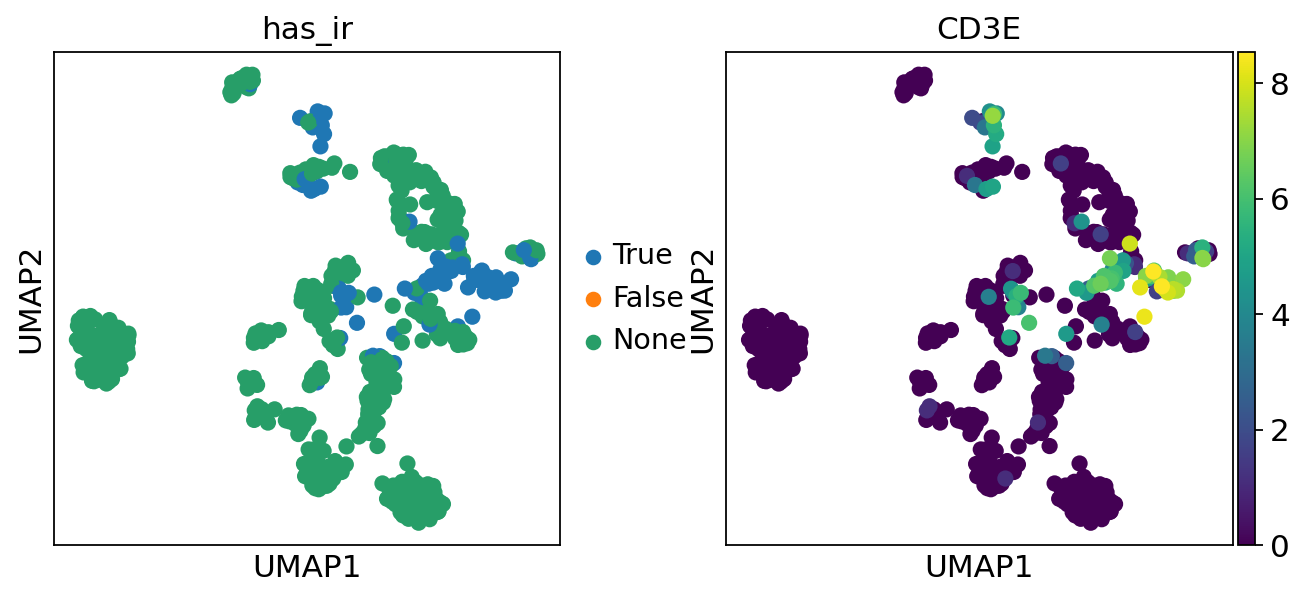

In [21]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=3000)
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E"])

In [22]:
# define sample metadata. Usually read from a file.
samples = {
    "C144": {"group": "mild"},
    "C146": {"group": "severe"},
    "C149": {"group": "healthy control"},
}

In [23]:
# Create a list of AnnData objects (one for each sample)
adatas = []
for sample, sample_meta in samples.items():
    gex_file = glob(f"example_data/liao-2019-covid19/*{sample}*.h5")[0]
    tcr_file = glob(f"example_data/liao-2019-covid19/*{sample}*.csv.gz")[0]
    adata = sc.read_10x_h5(gex_file)
    adata_tcr = ir.io.read_10x_vdj(tcr_file)
    ir.pp.merge_with_ir(adata, adata_tcr)
    adata.obs["sample"] = sample
    adata.obs["group"] = sample_meta["group"]
    # concatenation only works with unique gene names
    adata.var_names_make_unique()
    adatas.append(adata)

reading example_data/liao-2019-covid19/GSM4339772_C144_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading example_data/liao-2019-covid19/GSM4339774_C146_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading example_data/liao-2019-covid19/GSM4475052_C149_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [24]:
# Merge anndata objects
adata = anndata.concat(adatas)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


The data is now integrated in a single object.
Again, the detected TCRs coincide with `CD3E` gene expression.
We clearly observe batch effects between the samples -- for a meaningful downstream analysis further
processing steps such as highly-variable gene filtering and batch correction are necessary.

computing PCA


    with n_comps=50


    finished (0:00:09)


computing neighbors


    using 'X_pca' with n_pcs = 50


    finished (0:00:14)


computing UMAP


    finished (0:00:06)


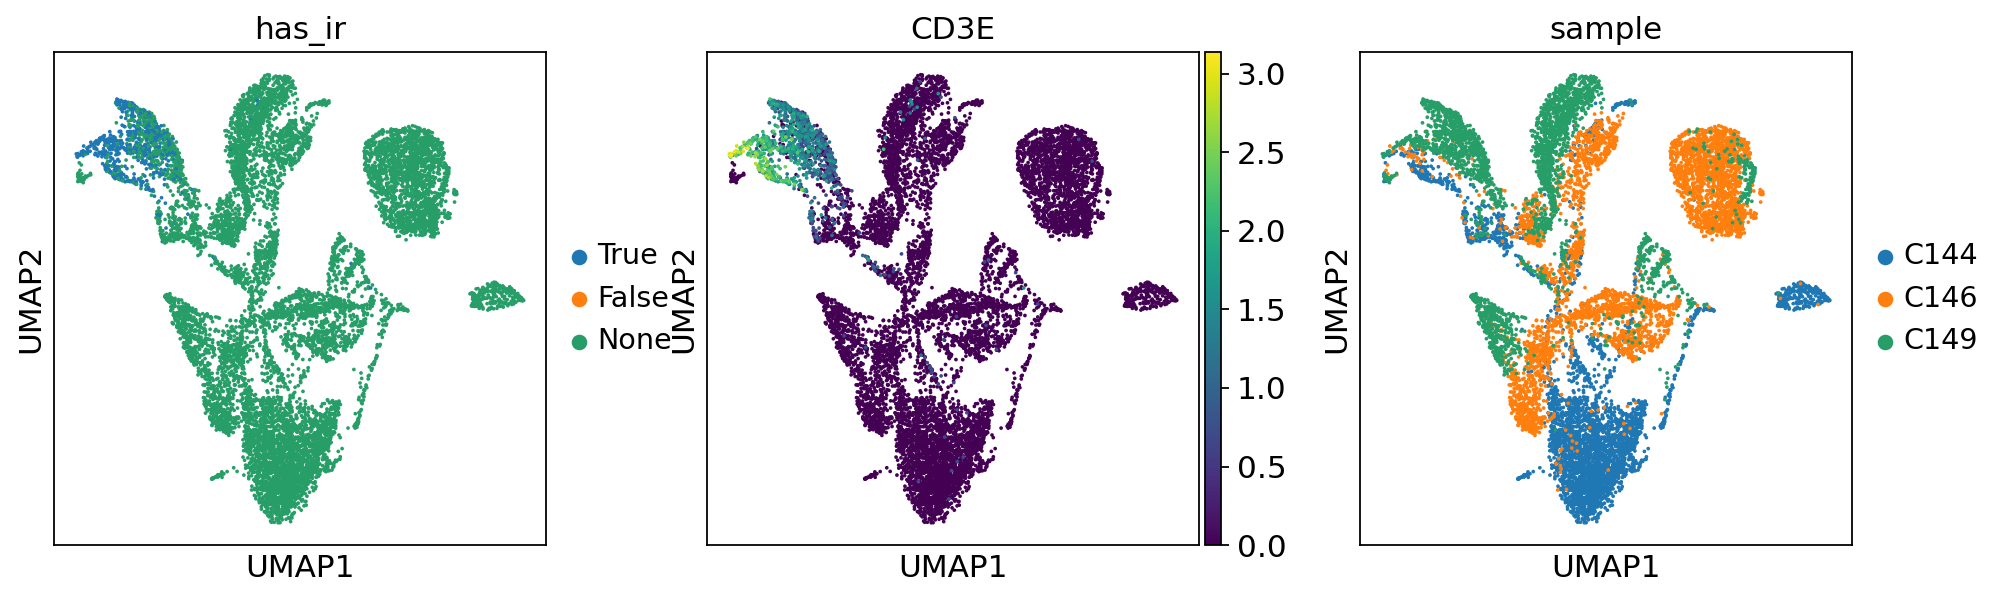

In [25]:
sc.pp.log1p(adata)
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["has_ir", "CD3E", "sample"])